# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

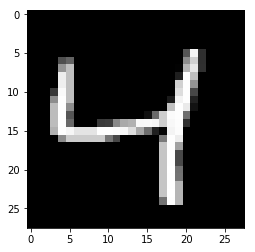

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name = "inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name = "targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = "output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_, logits = logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6954
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6849
Epoch: 1/20... Training loss: 0.6805
Epoch: 1/20... Training loss: 0.6753
Epoch: 1/20... Training loss: 0.6691
Epoch: 1/20... Training loss: 0.6624
Epoch: 1/20... Training loss: 0.6536
Epoch: 1/20... Training loss: 0.6435
Epoch: 1/20... Training loss: 0.6331
Epoch: 1/20... Training loss: 0.6205
Epoch: 1/20... Training loss: 0.6053
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5763
Epoch: 1/20... Training loss: 0.5599
Epoch: 1/20... Training loss: 0.5428
Epoch: 1/20... Training loss: 0.5252
Epoch: 1/20... Training loss: 0.5060
Epoch: 1/20... Training loss: 0.4857
Epoch: 1/20... Training loss: 0.4697
Epoch: 1/20... Training loss: 0.4537
Epoch: 1/20... Training loss: 0.4349
Epoch: 1/20... Training loss: 0.4183
Epoch: 1/20... Training loss: 0.4054
Epoch: 1/20... Training loss: 0.3923
Epoch: 1/20... Training loss: 0.3740
E

Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.2039
Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.2010
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1875
E

Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1540
E

Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1399
E

Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1199
E

Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1149
E

Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1141
E

Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1044
E

Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1091
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1016
E

Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0925
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0956
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0944
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0985
E

Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0982
E

Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0873
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0997
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0991
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0984
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

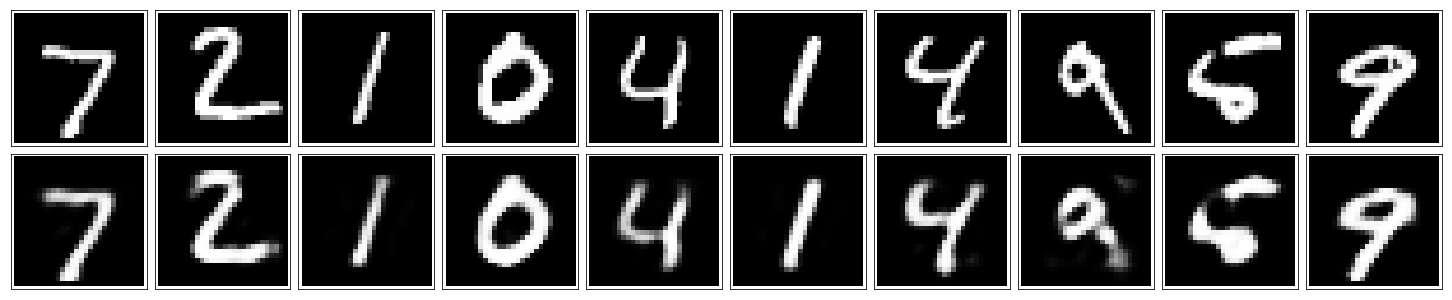

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.